In [3]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
import hdbscan
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
data_pca_tranformed = pd.read_excel("./pca_transformed_data.xlsx",index_col="Unnamed: 0")

In [100]:
# data_pca_tranformed

In [4]:
# DBSCAN
def findOptimalEps(n_neighbors, data):
    '''
    function to find optimal eps distance when using DBSCAN; based on this article: https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc
    '''
    neigh = NearestNeighbors(n_neighbors=n_neighbors)
    nbrs = neigh.fit(data)
    distances, indices = nbrs.kneighbors(data)
    distances = np.sort(distances, axis=0)
    distances = distances[:,1]
    plt.plot(distances)
    plt.grid(True)
    plt.xlabel("Data Points")
    plt.ylabel("Distance")
    plt.savefig("./clustering_output/plots/eps_plot.png")

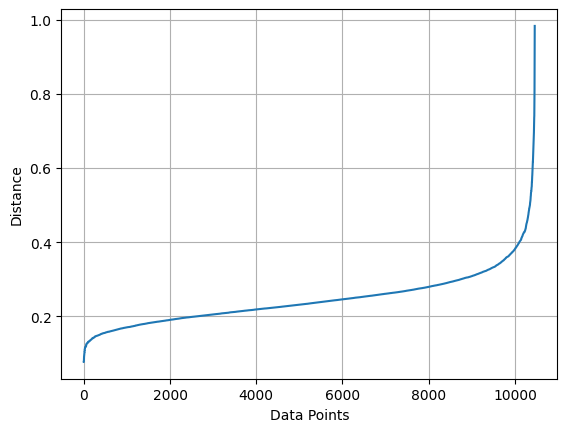

In [10]:
findOptimalEps(2, data_pca_tranformed)

In [13]:
dbscan = DBSCAN(eps=0.2, min_samples=10)
dbscan.fit(data_pca_tranformed)
# number of data points in each cluster
unique, counts = np.unique(dbscan.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 10340, 0: 12, 1: 65, 2: 44}


In [7]:
dbscan = DBSCAN(eps=0.25, min_samples=10)
dbscan.fit(data_pca_tranformed)
# number of data points in each cluster
unique, counts = np.unique(dbscan.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 7780, 0: 2453, 1: 12, 2: 10, 3: 15, 4: 137, 5: 16, 6: 8, 7: 9, 8: 11, 9: 10}


In [18]:
dbscan = DBSCAN(eps=0.4, min_samples=10)
dbscan.fit(data_pca_tranformed)
# number of data points in each cluster
unique, counts = np.unique(dbscan.labels_, return_counts=True)
print(dict(zip(unique, counts)))

{-1: 481, 0: 9980}


In [14]:
dbscan = DBSCAN(eps=0.4, min_samples=30)
dbscan.fit(data_pca_tranformed)
# number of data points in each cluster
unique, counts = np.unique(dbscan.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 717, 0: 9744}

In [18]:
# hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, gen_min_span_tree=True)
clusterer.fit(data_pca_tranformed)
# number of data points in each cluster
unique, counts = np.unique(clusterer.labels_, return_counts=True)
dict(zip(unique, counts))

{-1: 9269, 0: 10, 1: 64, 2: 1118}

In [20]:
# Mean Shift Clustering
ms = MeanShift()

In [21]:
ms.fit(data_pca_tranformed)

MeanShift()

In [22]:
labels = ms.labels_
# number of data points in each cluster
unique, counts = np.unique(labels, return_counts=True)
dict(zip(unique, counts))

{0: 10345, 1: 13, 2: 18, 3: 10, 4: 21, 5: 21, 6: 6, 7: 14, 8: 9, 9: 4}

In [23]:
# Gaussian Mixture Model

In [26]:
def gmm_silhouette(range_, data, figsize=(5,5)):
    silhouette_scores = {}

    for n in range_:
        gmm = GaussianMixture(n_components=n, random_state=42)
        gmm.fit(data)
        cluster_labels = gmm.predict(data)
        score_ = silhouette_score(data, cluster_labels)
        silhouette_scores[n] = score_

    print(silhouette_scores)

    x = range_
    y = [silhouette_scores[i] for i in range_]
    plt.figure(figsize=figsize)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('GMM Silhouette Score vs. Number of Clusters')
    plt.grid(True)
    plt.plot(x,y)
    plt.savefig("./clustering_output/plots/gmm_silhouette.png")

{2: 0.14965155583134526, 3: 0.08915435434192386, 4: 0.05870872906301478, 5: 0.02364199408473438, 6: 0.019220430568895684, 7: 0.03309532324848221, 8: 0.008218978863467683, 9: -0.006784096592465245, 10: -0.009041949543717325, 11: -0.011096764209190289, 12: 0.000256411566030841, 13: -0.007045090979946441, 14: -0.01797509183986755, 15: -0.0073719666312403965}


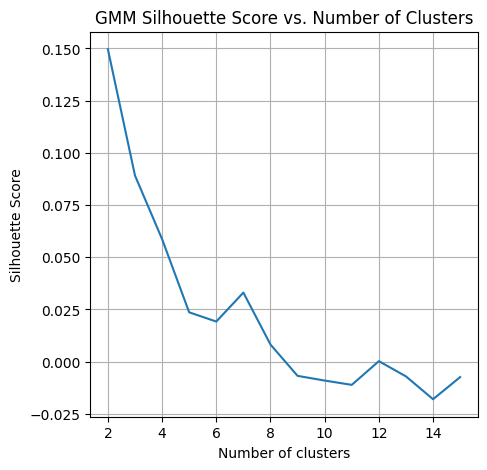

In [38]:
gmm_silhouette(range(2, 16), data_pca_tranformed)

In [29]:
# K-Means
def elbowPlotKMeans(range_, data, figsize=(5,5)):
    '''
    the elbow plot function helps to figure out the right amount of clusters for a dataset
    '''
    inertia_list = []
    for n in range_:
        kmeans = KMeans(n_clusters=n, random_state=42, n_init='auto')
        kmeans.fit(data)
        inertia_list.append(kmeans.inertia_)

    # plotting
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    sns.lineplot(y=inertia_list, x=range_, ax=ax)
    ax.set_xlabel("Clusters")
    ax.set_ylabel("Inertia")
    ax.set_xticks(list(range_))
    plt.title('K-Means Inertia vs. Number of Clusters')
    plt.grid(True)
    plt.show()
    fig.savefig("./clustering_output/plots/elbow_plot.png")

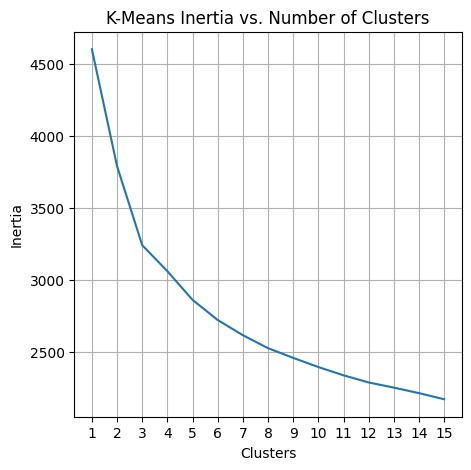

In [35]:
elbowPlotKMeans(range(1,16), data_pca_tranformed)

In [33]:
def kmeans_silhouette(range_, data, figsize=(5,5)):
    silhouette_scores = {}

    for n in range_:
        kmeans = KMeans(n_clusters=n, random_state=42, n_init='auto')
        labels = kmeans.fit_predict(data)
        score_ = silhouette_score(data, labels)
        silhouette_scores[n] = score_

    print(silhouette_scores)

    x = range_
    y = [silhouette_scores[i] for i in range_]
    plt.figure(figsize=figsize)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('K-Means Silhouette Score vs. Number of Clusters')
    plt.grid(True)
    plt.plot(x,y)
    plt.savefig("./clustering_output/plots/kmeans_silhouette.png")

{2: 0.16137656459904612, 3: 0.1665527473844795, 4: 0.14176843563927297, 5: 0.13267236687843878, 6: 0.12543608490963382, 7: 0.11817193212119301, 8: 0.11459147965317963, 9: 0.11080960402014182, 10: 0.10581884506187648, 11: 0.1036950436984279, 12: 0.10352165884129237, 13: 0.09977749449471233, 14: 0.09892422002922596, 15: 0.09567029196802215}


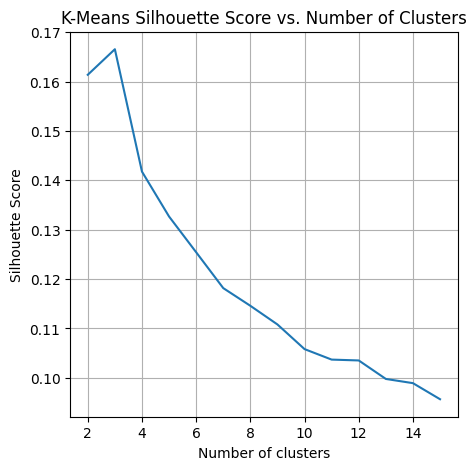

In [39]:
kmeans_silhouette(range(2, 16), data_pca_tranformed)

In [26]:
for num_clusters in range(7, 11):
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init='auto')
    if "clusters" in data_pca_tranformed.columns:
        data_pca_tranformed.drop(columns="clusters", inplace=True)
    data_ = data_pca_tranformed
    labels = kmeans.fit_predict(data_)
    data_pca_tranformed["clusters"] = labels
    cluster_array = data_pca_tranformed["clusters"].to_numpy()
    cluster_df = pd.DataFrame(cluster_array,columns=["clusters"])
    # number of data points in each cluster
    unique, counts = np.unique(labels, return_counts=True)
    print(num_clusters)
    print(dict(zip(unique, counts)))
    # output clusters to excel
    for cluster_number in range(num_clusters):
        data_pca_tranformed.iloc[cluster_df[cluster_df["clusters"] == cluster_number].index].to_excel(f'./clustering_output/clusters/{num_clusters}/cluster{cluster_number}.xlsx')
    # output players cluster assignments all in one excel file
    data_pca_tranformed.sort_index().to_excel(f'./clustering_output/clusters/{num_clusters}/all_players_cluster_assignments.xlsx')

7
{0: 1196, 1: 1345, 2: 1944, 3: 1224, 4: 1708, 5: 1303, 6: 1741}
8
{0: 1165, 1: 1649, 2: 1075, 3: 1091, 4: 1321, 5: 1183, 6: 1322, 7: 1655}
9
{0: 1169, 1: 906, 2: 1052, 3: 1031, 4: 1289, 5: 988, 6: 1237, 7: 1253, 8: 1536}
10
{0: 915, 1: 1306, 2: 824, 3: 999, 4: 1106, 5: 1087, 6: 746, 7: 1003, 8: 1389, 9: 1086}


In [40]:
## Hierarchical agglomerative clustering
if "clusters" in data_pca_tranformed.columns:
    data_pca_tranformed.drop(columns="clusters", inplace=True)

In [43]:
def hac_silhouette(range_, data, figsize=(5,5)):
    silhouette_scores = {}

    for n in range_:
        clusterer = AgglomerativeClustering(n_clusters=n, linkage='ward')
        clusterer.fit_predict(data)
        cluster_labels = clusterer.labels_
        score_ = silhouette_score(data, cluster_labels)
        silhouette_scores[n] = score_

    print(silhouette_scores)

    x = range_
    y = [silhouette_scores[i] for i in range_]
    plt.figure(figsize=figsize)
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('HAC Silhouette Score vs. Number of Clusters')
    plt.grid(True)
    plt.plot(x,y)
    plt.savefig("./clustering_output/plots/hac_silhouette.png")

{2: 0.15918726179991408, 3: 0.12552922115476098, 4: 0.10745468255575175, 5: 0.09259594099833861, 6: 0.07774234203355139, 7: 0.06903018911512729, 8: 0.06472518341793855, 9: 0.057710534210165136, 10: 0.05559389358741981, 11: 0.04984310816875531, 12: 0.049163028753986045, 13: 0.041688616596184495, 14: 0.041706183799205446, 15: 0.0399684130378872}


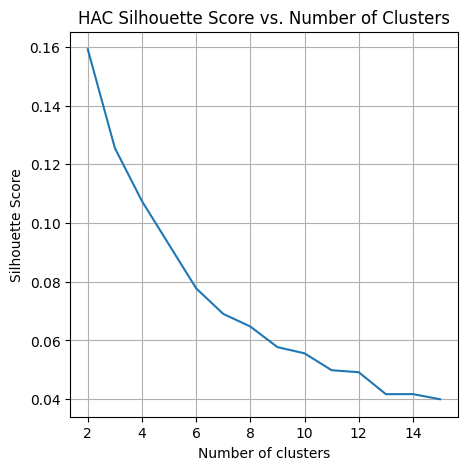

In [44]:
hac_silhouette(range(2, 16), data_pca_tranformed)